<a href="https://colab.research.google.com/github/talanthier/Math-152/blob/main/EpidemiologyG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Epidimiology Modeled and Graphed in Python


##Coronavirus: Humanity's Last Stand


###Authored by: Denali Wilson, Angelly Aquise, Conrad Ainslie, Hadar Goldstein, Timothy Lanthier

###Introduction: 

In this project we used the python programming language and several of its tools to create several spread of disease SIR models using a variety of different factors. We created a baseline model which contains the numbers for a total population and an infected population, and cycles through several reproduction numbers to analyze how different ratios affect the trends differently. We used imported library matplotlib in order to plot the data on a graph for the reader to visualise the trends, it is also possible to recieve the numbers in a numpy array format upon request should the reader need it for their research.  

After this the reader will find several other models where we explore additional factors added onto the baseline model such as masked/unmasked populations and deceased populations. We decided these are the most pressing real world factors that would affect the model and give it more realistic characteristics. Others were taken into consideration but ultimately it is the feeling of this group that these were vitally necessary to the addition of this exploration.

In each section we will analyze and discuss our models to lay out in plain detail what each one is designed to calculate and the mathematical reasoning behind it. We have also added comments and documentation to all our code to explain line by line what is being executed so the reader can follow the code as well.

We close this paper with a conclusion in which we summarize what we have learned throughout the process of calculating these trends and what we can further analyze in the future.

###Baseline Model

The model below is our simplest SIR model. Based off of a total population $N$, this model keeps track of the infected population $I$, susceptible population $S$, and the recovered population $R$. On the day $t$, we let $S_t, I_t,$ and $R_t$ denote the number of people in the groups $S,I,$ and $R$ respectively on day $t$. In our model, the population in each group changes according to these rules
\begin{align*}
  S_{t+1} &= S_t - \beta\frac{I_t S_t}{N} \\
  I_{t+1} &= I_t + \beta\frac{I_t S_t}{N} - \gamma I_t \\
  R_{t+1} &= R_t + \gamma I_t
\end{align*}
where $\gamma$ is the recovery rate (percent of infected people recovering each day) and $\beta$ measures the number of people infected by each infected person each day.

The function `baseline_model` below keeps track of the number of people in each group $S$, $I$, and $R$ over some fixed time period `t`. In our function, $\beta$ and $\gamma$ are represented by the variables `infection` and `recovery` respectively. `baseline_model` returns a numpy array with one row for each day. Each row contains the day and number of people in each group.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def baseline_model(N = 1000000, I = 100, recovery = 0.5, infection = 1, t=30):
  '''
  Models the spread of a disease over a given time period. Returns the results as a
  numpy array with time, number susceptible, number infected, and number recovered as
  the columns. One row for each day.

  N : Total Population
  I : Initial Infected Population
  recovery : recovery rate (% of infected people recovering each day)
  infection : expected number of people infected by each infected person each day
  t : time in days
  '''
  S=N-I #Susceptible population
  R=0 #Recovered population
  results = np.array([0,S,I,R]) # Stores data in numpy array
  for x in range(t): #updating population variables according to equations t times
    Splus=S-(infection*I*S/N)
    Iplus=I+(infection*I*S/N)-(recovery*I) 
    R+=(recovery*I) #no temp variable needed
    S=Splus #temporary variables are updated
    I=Iplus
    results = np.vstack((results,[x,S,I,R])) # adds new row to our results array
  return results



The code below makes a simple plot of the $S$, $I$, and $R$ populations over a period of 30 days. In this plot, we are letting $\beta = 1$ and $\gamma = 0.5$ with a total population on 1 million people and a starting infected population of 100 people.

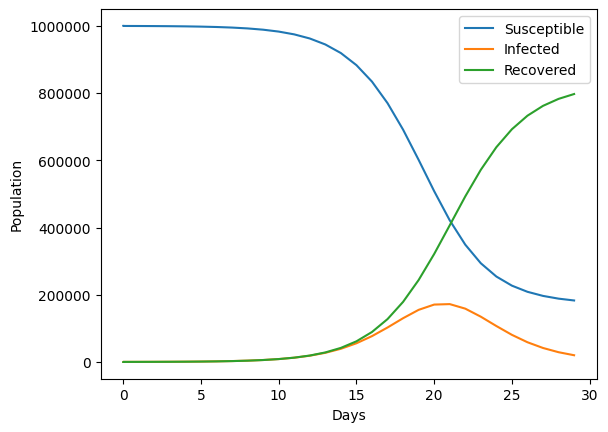

In [ ]:
data = baseline_model(t = 30)

plt.style.use('default')
plt.plot(data[:,0],data[:,1], label = 'Susceptible')
plt.plot(data[:,0],data[:,2], label = 'Infected')
plt.plot(data[:,0],data[:,3], label = 'Recovered')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Population')
plt.ticklabel_format(style='plain')

### Effect of the Basic Reproduction Number

In our model, the Basic Reproduction Number is defined as the ratio $\frac{\beta}{\gamma}$ where $\beta$ is the expected number of people infected by each infected person each day and $\gamma$ is the proportion of infected individuals recovering each day. In our `baseline_model` function, $\beta$ and $\gamma$ are denoted by `infection` and `recovery` respectively. In this section, we're going to investigate the effect different values for the Basic Reproduction Number has on our model.

In order to keep our model consistent, we're going to set the total population to $1{,}000{,}000$ and the starting infected population to $100$. From here we're going to play around with different values of $\beta$ and $\gamma$ over a time period of 30 days. 

Lets start by fixing $\gamma$ at 0.25. The code cell below plots the number of infected people and number of recovered people for different values of $\beta$. The curves for the infected and recovered populations are plotted on separate figures so it is easier to read.

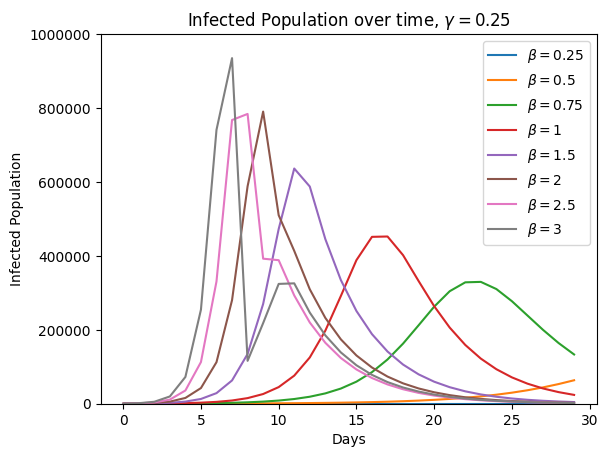

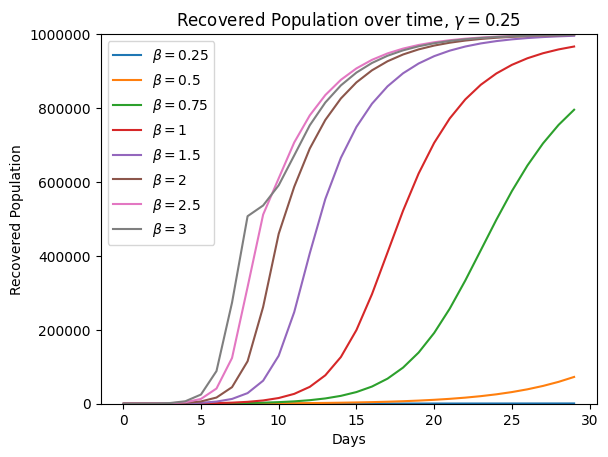

In [ ]:
beta_list = [0.25, 0.5, 0.75,1 ,1.5 ,2 ,2.5 ,3] # List of beta values for testing.
gamma = 0.25
for i in beta_list: # Runs through each of our values for beta
  temp_results = baseline_model(N = 1000000, I = 100, recovery = gamma, infection = i, t = 30)
  plt.plot(temp_results[:,0], temp_results[:,2], label = r'$\beta = ${}'.format(i))
plt.xlabel('Days')
plt.ylabel('Infected Population')
plt.ylim(0,1000000)
plt.ticklabel_format(style='plain')
plt.legend()
plt.title(r'Infected Population over time, $\gamma = {}$'.format(gamma))
plt.show()
for j in beta_list:
  temp_results = baseline_model(N = 1000000, I = 100, recovery = gamma, infection = j, t=30)
  plt.plot(temp_results[:,0], temp_results[:,3], label = r'$\beta = ${}'.format(j))
plt.xlabel('Days')
plt.ylabel('Recovered Population')
plt.ylim(0,1000000)
plt.ticklabel_format(style='plain')
plt.legend()
plt.title(r'Recovered Population over time, $\gamma = {}$'.format(gamma))
plt.show()

As we can see, a higher infection rate $\beta$ and higher basic reproduction number $\frac{\beta}{\gamma}$ leads to the peak infections being both higher in number and earlier. With our fixed recovery rate $\gamma = 0.25$, we can see that with $\beta = 1$, the peak number of infections is around $500{,}000$ people on about day 16. Meanwhile with $\beta = 2$, we have an earlier and higher peak number of infections with around $600{,}000$ infected people on about day 11. But notice that with $\beta = 0.25$ and $\gamma = 0.25$, the infected population appears to remain low and fairly stable. So it appears a higher basic reproduction number means a faster spread of the infection.

Now we'll compare the effect of different values of $\gamma$. For this, we'll keep the total population to $1{,}000{,}000$ with an initial infected population of $100$. We're also going to set $\beta = 1$. The code below plots the infected and recovered populations on separate figures much like the code above, however this time each individual curve is base on a different value of $\gamma$ for fixed $\beta$.

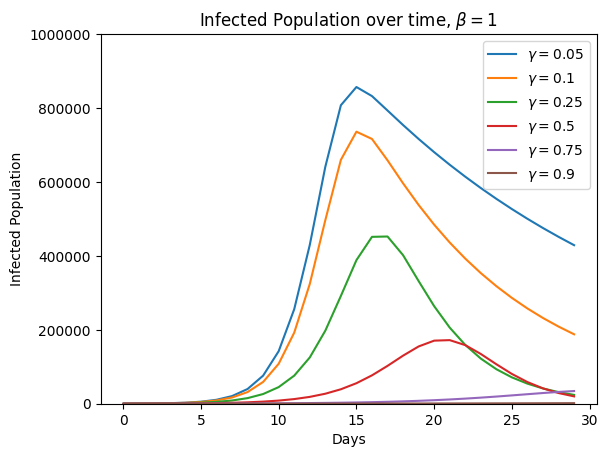

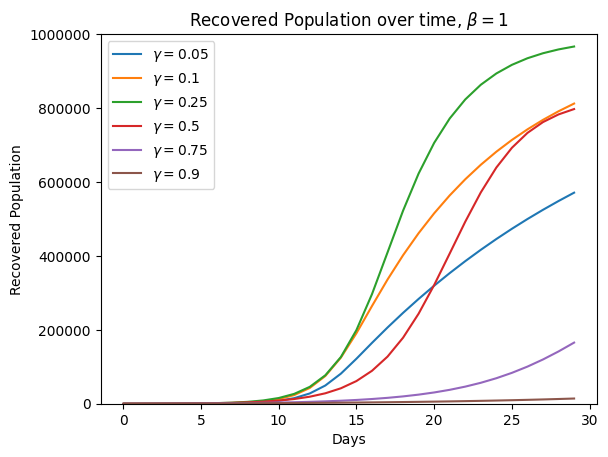

In [ ]:
gamma_list = [0.05, 0.1,0.25, 0.5, 0.75, 0.9] # List of gamma values for testing.
beta = 1
for i in gamma_list: # Runs through each of our values for gamma
  temp_results = baseline_model(N = 1000000, I = 100, recovery = i, infection = beta, t = 30)
  plt.plot(temp_results[:,0], temp_results[:,2], label = r'$\gamma = ${}'.format(i))
plt.xlabel('Days')
plt.ylabel('Infected Population')
plt.ylim(0,1000000)
plt.ticklabel_format(style='plain')
plt.legend()
plt.title(r'Infected Population over time, $\beta = {}$'.format(beta))
plt.show()
for j in gamma_list:
  temp_results = baseline_model(N = 1000000, I = 100, recovery = j, infection = beta, t=30)
  plt.plot(temp_results[:,0], temp_results[:,3], label = r'$\gamma = ${}'.format(j))
plt.xlabel('Days')
plt.ylabel('Recovered Population')
plt.ylim(0,1000000)
plt.ticklabel_format(style='plain')
plt.legend()
plt.title(r'Recovered Population over time, $\beta = {}$'.format(beta))
plt.show()

Here we can see that a lower recovery rate $\gamma$ contributes to an earlier and higher peak in number of infections. Once again, a low recovery rate $\gamma$ is reflected in a high basic reproduction number $\frac{\beta}{\gamma}$. This corroborates our hypothesis from the effect of $\beta$ that a the basic reproduction number predicts how fast the infection spreads. The higher the basic reproduction number, the faster the infection will spread. The smaller, the easier it is to get under control.

This section contains our augmented models. Once we had the Susceptible/Infected/Recovered equations in place, we experimented with adding new populations and model features. Many of the features we chose were informed by the current global pandemic. Each model is accompanied by a justification of the mathematical changes made, and an analysis of the ramifications of the updated model. Included at the top are two early iterations of the model that we built upon.


In [ ]:
#legacy model code
'''
def model_disease(t):
  #Declaring initial values of system variables
  N=1000000 #Total population
  S=999000 #Susceptible population
  I=1000 #Infected population
  R=0 #Recovered population (Given equations assume recovered population are no longer susceptible, could be interesting to explore changing that)
  recovery=.5 #%of sick people recovering daily (denoted gamma)
  infection=1 # amount of people infected per person per day (denoted beta)

  for x in range(t): #updating population variables according to equations t times
    Splus=S-(infection*I*S/N)
    Iplus=I+(infection*I*S/N)-(recovery*I) 
    R+=(recovery*I) #no temp variable needed
    S=Splus #temporary variables are updated
    I=Iplus
  print("After {} years and {} days, there are:\n {} Susceptible\n {} Infected\n {} Recovered".format(t//365, t%365, S, I, R))
  print('SumCheck: {}'.format(S+I+R))
#for x in range(0, 30, 1):  #iterating function to see behaviour over time
  #model_disease(x)
''' 

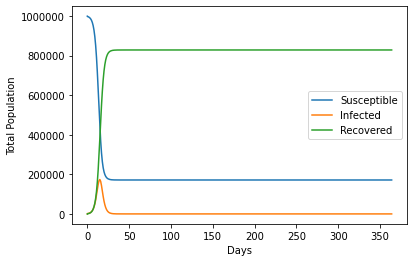

In [ ]:
#legacy graphing code
'''
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def model_disease(N = 1000000, I = 1000, recovery = 0.5, infection = 1, t=30):
  #Declaring initial values of system variables
  #N=1000000 #Total population 
  S=N-I #Susceptible population
  #I=1000 #Infected population
  R=0 #Recovered population (Given equations assume recovered population are no longer susceptible, could be interesting to explore changing that)
  #recovery=.5 #%of sick people recovering daily (denoted gamma)
  #infection=1 # amount of people infected per person per day (denoted beta)
  results = np.array([0,S,I,R])

  for x in range(t): #updating population variables according to equations t times
    Splus=S-(infection*I*S/N)
    Iplus=I+(infection*I*S/N)-(recovery*I) 
    R+=(recovery*I) #no temp variable needed
    S=Splus #temporary variables are updated
    I=Iplus
    results = np.vstack((results,[x,S,I,R])) # adds new row to our results array
  #print("After {} years and {} days, there are:\n {} Susceptible\n {} Infected\n {} Recovered".format(t//365, t%365, S, I, R))
  #print('SumCheck: {}'.format(S+I+R))
  return results

def pandemic_length(results): # finds time where there are no more infected people
    for i in range(len(results)-1):
        if results[i,2] < 1: # accounts for data being real numbers (not integers)
            return i
    print('Try wider time range.')
    return None

data = model_disease(t=365)
length = pandemic_length(data)

plt.plot(data[:,0],data[:,1], label = 'Susceptible')
plt.plot(data[:,0],data[:,2], label = 'Infected')
plt.plot(data[:,0],data[:,3], label = 'Recovered')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Total Population')
plt.ticklabel_format(style='plain')
plt.show()
'''

The below model was created in order to explore the effects of Masked/Unmasked populations in the model. This can also be generalized to refer to any groups with different rates of infection. I split the susceptible population and the infected population into masked and unmasked groups, with a slightly higher value of beta, (the infectivity of the illness) for the unmasked population. When infected, masked/unmaksed populations move to their respective sick populations, and eventually move into a shared recovery group. I have played around with changing the ratio between masked/unmasked infectivity (how much does wearing a mask protect you from illness), as well as weighting the infected count of masked/unmasked population in order to account for propensity to quarantine/spread the disease. (unmasked individuals are assumed to quarantine less seriously if at all, some masked individuals are assumed to quarantine, though not all fully) . As one would predict, this model shows unmasked individuals infected at a noticeably higher rate, peaking their infected population more quickly and to higher numbers. In fact, in the model generated by the parameters below, the entire unmasked population is infected very quickly, and eventually recover to the point where a non-negligible proportion of the masked population is able to survive the epidemic without infection.

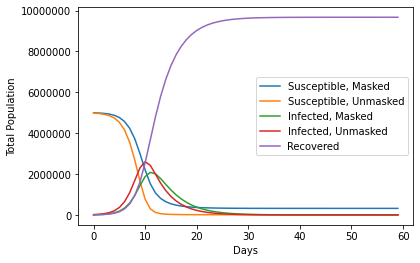

In [ ]:
#Experimenting with masked/nonmasked populations with different rates of infection/infectivity

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def model_disease(t):
  #Declaring initial values of system variables
  N=10000000 #Total population 
  S_mask=5000000 #Mask wearing, susceptible population
  S_no_mask=4990000 #Non mask wearing, susceptible population
  I_mask=0 #Mask wearing, Infected population
  I_no_mask=10000 #Mask-averse, 
  R=0 #Recovered population 
  recovery=.25 #%of sick people recovering daily (denoted gamma)
  infection=1 # amount of people infected per person per day (denoted beta)
  infection_masked=.5*infection #assigns amount of masked people infected per day based on a ratio of .5 to base infectivity
  results = np.array([0,S_mask,S_no_mask,I_mask,I_no_mask,R])

  for x in range(t): #updating population variables according to equations t times
    I=(2*I_no_mask)+(.5*I_mask) #Making a single constant I to represent a weigthed sum of infected populations
    S_mask_plus=S_mask-(infection_masked*I*S_mask/N)
    S_no_mask_plus=S_no_mask-(infection*I*S_no_mask/N)
    I_mask_plus=I_mask+(infection_masked*I*S_mask/N)-(recovery*I_mask) 
    I_no_mask_plus=I_no_mask+(infection*I*S_no_mask/N)-(recovery*I_no_mask)
    R+=(recovery*I_mask)+(recovery*I_no_mask) #no temp variable needed
    S_mask=S_mask_plus #temporary variables are updated
    S_no_mask=S_no_mask_plus
    I_mask=I_mask_plus
    I_no_mask=I_no_mask_plus
    results = np.vstack((results,[x,S_mask,S_no_mask,I_mask,I_no_mask,R])) # adds new row to our results array
  return results
data = model_disease(60) #assigns vstack with results for a 60 day model to variable data
plt.plot(data[:,0],data[:,1], label = 'Susceptible, Masked')#plots all data
plt.plot(data[:,0],data[:,2], label = 'Susceptible, Unmasked')
plt.plot(data[:,0],data[:,3], label = 'Infected, Masked')
plt.plot(data[:,0],data[:,4], label = 'Infected, Unmasked')
plt.plot(data[:,0],data[:,5], label = 'Recovered')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Total Population')
plt.ticklabel_format(style='plain')
plt.show()

The below model was created as a modification of the original SIR model to include deaths due to infection (other causes of death not included).
Inclusion of deaths modifies SIR equations by decreasing number of infections as the number of deaths increase, thus showing an inverse relationship between infections and deaths. The modified equations are as below: 

$I_t=I_{t-1}+ \frac{infection\cdot I\cdot S}{N} - recovery\cdot I - death \cdot I$

$D_t=D_{t-1}+ death\cdot I$

The death rate listed is of 0.65% of the general population, the value from the data I found




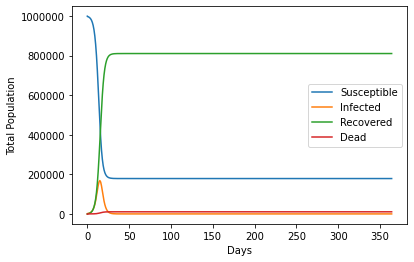

In [ ]:
#plot including deaths 

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def model_disease(t):
  #Declaring initial values of system variables
  N=1000000 #Total population 
  S=999000 #Susceptible population
  I=1000 #Infected population
  R=0 #Recovered population (Given equations assume recovered population are no longer susceptible, could be interesting to explore changing that)
  D=0 #dead population
  recovery=.5 #%of sick people recovering daily (denoted gamma)
  infection=1 # amount of people infected per person per day (denoted beta)
  death=0.0066 #% of sick people dying from disease 
  results = np.array([0,S,I,R,D]) # columns 

  for x in range(t): #updating population variables according to equations t times
    Splus=S-(infection*I*S/N)
    Iplus=I+(infection*I*S/N)-(recovery*I)-(death*I) #infected decrease as deaths occur
    R+=(recovery*I) #no temp variable needed
    D+=(death*I) #track deaths 
    S=Splus #temporary variables are updated
    I=Iplus
    results = np.vstack((results,[x,S,I,R,D])) # adds new row to our results array
  #print("After {} years and {} days, there are:\n {} Susceptible\n {} Infected\n {} Recovered".format(t//365, t%365, S, I, R))
  #print('SumCheck: {}'.format(S+I+R))
  return results
data = model_disease(365)

plt.plot(data[:,0],data[:,1], label = 'Susceptible')
plt.plot(data[:,0],data[:,2], label = 'Infected')
plt.plot(data[:,0],data[:,3], label = 'Recovered')
plt.plot(data[:,0],data[:,4], label = 'Dead')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Total Population')
plt.ticklabel_format(style='plain')
plt.show()

The model below is a slightly modified version of the model containing deaths as this model contains both death and vaccine functionality. The creation of the vaccine is modeled by a term named Vprog, which is the percentage of progress made on completing the vaccine in a given day. This term is currently static as the vaccine's completion is the only thing that matters, changes in research speed can be accounted for when declaring the function. Before the vaccine is completed, the equations in the model are the exact same as the equations in the previous model. 
 
Upon the completion of the vaccine, a modification of the equations dealing with both the susceptible and recovered populations take place where the susceptible population decreases by the term Vrate, which is the amount of vaccine doses administered per day. The recovered population therefore gains Vrate people per day as every vaccinated person is now no longer susceptible to the disease. 
  
We decided not to include a variable for vaccine effectiveness or variance in research speed as when dealing with a large scale, both variables can simply be taken into account when defining Vrate and Vprog. For example, if the vaccine is only 50% effective, make Vrate half as large, as Vrate is really tracking how many people the vaccine makes immune in a given day, much like how Vprog is only really tracking how long it takes until the vaccine is finished. 


In [1]:
#plot including deaths and vaccine

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def model_disease_wvac(t,Vprog,Vrate):
  #Declaring initial values of system variables
  N=1000000 #Total population 
  S=999000 #Susceptible population
  I=1000 #Infected population
  R=0 #Recovered population (Given equations assume recovered population are no longer susceptible, could be interesting to explore changing that)
  D=0 #dead population
  #Vprog is % of progress made on vaccine per day
  #Vrate is number of people who get vaccinated each day
  recovery=.025 #%of sick people recovering daily (denoted gamma)
  infection=.35 # amount of people infected per person per day (denoted beta)
  death=.03 #% of sick people dying from disease 
  results = np.array([0,S,I,R,D])
  Vsum=0
  for x in range(t): #updating population variables according to equations t times
    if Vsum>100 and S>0:
      Splus=S-(infection*I*S/N)-Vrate #Sus people becoming vaccinated
      R+=(recovery*I)+Vrate           #^^^
    else:
      Splus=S-(infection*I*S/N)
      R+=(recovery*I) 
      Vsum+=Vprog #keeping track of vaccine progress, only used in if statement. 
    Iplus=I+(infection*I*S/N)-(recovery*I)-(death*I)
    D+=(death*I)
    S=Splus #temporary variables are updated
    I=Iplus
    results = np.vstack((results,[x,S,I,R,D])) # adds new row to our results array
  #print("After {} years and {} days, there are:\n {} Susceptible\n {} Infected\n {} Recovered".format(t//365, t%365, S, I, R))
  #print('SumCheck: {}'.format(S+I+R))
  return results

When graphing results from this modified model, we implemented a vertical blue line to demonstrate when the vaccine is finished and starts causing a rise in the recovered population. The following graph shows both a model with vaccine and one without.

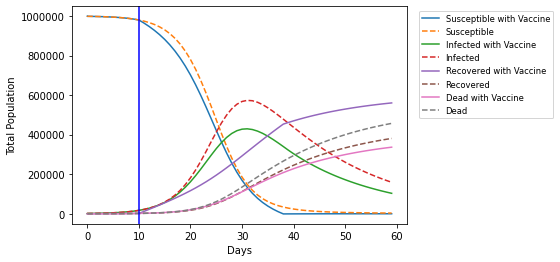

In [ ]:
data = model_disease_wvac(60,10,10000)# has a vaccine finished in 10 days and distributed to 10000 people a day.
data2= model_disease_wvac(60,0,0)# has no vaccine

plt.plot(data[:,0],data[:,1], label = 'Susceptible with Vaccine')
plt.plot(data2[:,0],data2[:,1],'--', label = 'Susceptible')
plt.plot(data[:,0],data[:,2], label = 'Infected with Vaccine')
plt.plot(data2[:,0],data2[:,2],'--', label = 'Infected')
plt.plot(data[:,0],data[:,3], label = 'Recovered with Vaccine')
plt.plot(data2[:,0],data2[:,3],'--', label = 'Recovered')
plt.plot(data[:,0],data[:,4], label = 'Dead with Vaccine')
plt.plot(data2[:,0],data2[:,4],'--', label = 'Dead')
plt.legend(bbox_to_anchor=(1.45, 1),loc='upper right',fontsize='small')
plt.xlabel('Days')
plt.ylabel('Total Population')
plt.ticklabel_format(style='plain')
plt.axvline(x=100/10, color='b') #this is the vaccine finished line, has to be changed based on the value of Vprog used, its x=100/Vprog (in this case Vprog=10)
plt.show()

One can see that while the vaccine didn't have a noticeable change on the susceptible population, there was a large change in every other group. Furthermore, the sharp change in both the vaccinated susceptible and recovered populations is due to the fact that Vrate is a static variable and applies a linear change to both groups. When susceptible with vaccine reaches 0, this linear change is no longer applied to either susceptible or recovered and we get that sharp edge.  

#Conclusion

The mathematical modeling of epidemics is an especially personal problem for everyone these days. Unfortunately, as we sit in the middle of the largest pandemic in centuries, it is painfully obvious that no simple mathematical model can describe the way illness spreads throughout our communities. 

Nonetheless, models such as these can provide valuable insight into how any kind of contagion works. Computer programming is uniquely well situated to process and display these kinds of recursive models. Instead of having to compute and record every value for every day by hand, we can change model parameters and visualize their effect in the blink of an eye. Exploring and manipulating these models has been effective for building an intuition regarding how values of infectivity and the recovery rate change the course of the epidemic, in addition to all of the other factors we added in our further exploration. Overall, this has been an excellent learning experience for both data management in Python and the study of epidemics.